# Exploratory Data Analysis - Customer loans in finance 

## Accessing the data 

Importing files and modules needed to access and manipulate the data given within this notebook

In [1]:
import db_utils
import df_transforms
import df_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import scipy
import seaborn as sns
import yaml
pio.renderers.default = "notebook"

Using the 'RDSDatabaseConnector' class to initialise the database and load into a CSV file

In [2]:
with open('credentials.yaml') as file:
    credentials_dict = yaml.safe_load(file)
    
credentials = db_utils.RDSDatabaseConnector(credentials_dict)
loan_payments = credentials.initialise_database()
credentials.save_file(loan_payments, 'new_file.csv')

database = credentials.load_csv('new_file.csv')


Printing the first 10 rows of the database so that we can see all of the database columns as well as the information each column contains

In [3]:
database.head(10)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   
5  38656111   41439917         2525         2525.0             2525.0   
6  38656110   41439916         6675         6675.0             6675.0   
7  38656067   41439872        26500        26500.0            26200.0   
8  38656063   41439868        10000        10000.0            10000.0   
9  38656052   41439857        10000            NaN            10000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   
5  36 months     11.44       83.20     B        B4  ...        0.0   
6        NaN     21.99      254.89     E        E5  ...        0.0   
7        NaN     19.99      701.95     E        E3  ...        0.0   
8  60 months     12.99      227.48     C        C2  ...        0.0   
9  36 months      8.19      314.25     A        A5  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1                     0.0           Jan-2022              407.52   
2                     0.0           Oct-2021            12850.16   
3                     0.0           Jun-2021            13899.67   
4                     0.0           Jan-2022              456.54   
5                     0.0           Jan-2022               91.39   
6                     0.0           Mar-2021             6724.95   
7                     0.0           Aug-2021              701.95   
8                     0.0           Jan-2022              227.48   
9                     0.0           Jan-2022              314.25   

  next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                        0.0   
1          Feb-2022              Jan-2022                        0.0   
2               NaN              Oct-2021                        0.0   
3               NaN              Jun-2021                        0.0   
4          Feb-2022              Jan-2022                        0.0   
5          Feb-2022              Jan-2022                        0.0   
6               NaN              Mar-2021                        0.0   
7               NaN              Jan-2022                        0.0   
8          Feb-2022              Jan-2022                        0.0   
9          Feb-2022              Jan-2022                        0.0   

  mths_since_last_major_derog  policy_code  application_type  
0                         5.0            1        INDIVIDUAL  
1                         NaN            1        INDIVIDUAL  
2                         NaN            1        INDIVIDUAL  
3                         NaN            1        INDIVIDUAL  
4                         NaN            1        INDIVIDUAL  
5                         NaN            1        INDIVIDUAL  
6                         NaN            1        INDIVIDUAL  
7                        43.0            1        INDIVIDUAL  
8                         NaN            1        INDIVIDUAL  
9                         NaN            1        INDIVIDUAL  

[10 rows x 43 columns]

# Exploratory Data Analysis

Initialising 'DataFrameInfo' class so that we can print out information about the dataframe

In [4]:
df_info = df_utils.DataFrameInfo(database)

Printing information about the dataframe

In [5]:
print(df_info.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_status  

Printing out the column names and the amount of unique values each column contains

In [6]:
print("{:<35} {:<15}\n".format('Column name','Number of unique values'))

for col in database.columns:
    print("{:<35} {:<15}".format(col, len(df_info.unique_vals(col))))

Column name                         Number of unique values

id                                  54231          
member_id                           54231          
loan_amount                         1083           
funded_amount                       1123           
funded_amount_inv                   5261           
term                                3              
int_rate                            458            
instalment                          19940          
grade                               7              
sub_grade                           35             
employment_length                   12             
home_ownership                      5              
annual_inc                          6132           
verification_status                 3              
issue_date                          61             
loan_status                         9              
payment_plan                        2              
purpose                             14             
dti

Splitting the columns into different dtype groups based on the type of data it contains as well as the number of unique values the column contains

In [7]:
fixed_data = ['id','member_id']

date_data = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

categorical_data = ['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 
                    'loan_status', 'payment_plan', 'purpose', 'policy_code', 'application_type']

non_numeric_data = date_data + categorical_data + fixed_data
numeric_data = [data_column for data_column in database.columns if data_column not in non_numeric_data]


Initialising the 'DataTransform' class so that we can transform the columns of the dataframe into the correct dtype.

In [8]:
data_transform = df_transforms.DataTransform(database)

Changing the dtypes of the columns which consists of only date data and ones that only consist of categories

In [9]:
for date_column in date_data:
    data_transform.date_data(date_column)

for categories in categorical_data:
    data_transform.change_type(categories, 'category')

Checking the amount of null values in each column as well as the amount as a percentage of the whole column

In [10]:
print("{:<35} {:<35} {:<20}\n".format('Column name','Number of missing values','Percentage of missing values'))

null_count = df_info.missing()

for null_col, null_qty in null_count.items():
    print("{:<35} {:<35} {:<20}".format(null_col,null_qty[0],null_qty[1]))

Column name                         Number of missing values            Percentage of missing values

id                                  0                                   0.0                 
member_id                           0                                   0.0                 
loan_amount                         0                                   0.0                 
funded_amount                       3007                                5.54                
funded_amount_inv                   0                                   0.0                 
term                                4772                                8.8                 
int_rate                            5169                                9.53                
instalment                          0                                   0.0                 
grade                               0                                   0.0                 
sub_grade                           0                        

Dropping columns whose data consists of more than 50% null values

In [11]:
for null_heading, null_amounts in null_count.items():
    if null_amounts[1] > float(50):
        database.drop(null_heading, axis=1, inplace=True)

Making the 'funded_amount' column the same as the 'loan_amount' column to clear any missing values from the 'funded_amount' column.

In [12]:
database['funded_amount'] = database['loan_amount']

Initialising the 'DataFrameTransform' method

In [13]:
df_transform = df_transforms.DataFrameTransform(database)

Making a dictionary 'fill_values' to add columns that have missing values as well as the values to fill them in with. Since the columns 'collections_12_mths_ex_med' and 'int_rate' columns are made up of float/integers, the missing values will be imputed using the mean of the column data. For the 'term' column, as it is categorical, its missing values will be imputed using thhe mode of the column values.

In [14]:
fill_values = {'collections_12_mths_ex_med': database['collections_12_mths_ex_med'].mean, 'term': database['term'].mode()[0], 'int_rate': database['int_rate'].mean}
df_transform.fill_null(values= fill_values)

In the next loop, we are checking and updating 3 columns:
- 'collections_12_mths_ex_med': for this we are checking if the value is zero and whether or not a last payment date exists for this customer - if a last payment date exists, we can add 1 to the original value
- 'last_payment_date': for this, we are checking if there are any missing values, if there is we replace them with the 'last_credit_pull_date' value
- 'last_credit_pull_date': the same as 'last_payment_date' except we are replacing the missing values with the ones given in 'last_payment_date'

In [15]:
for index in range(df_info.df_shape()[0]):
    if database.loc[index, 'collections_12_mths_ex_med'] == 0 and database.loc[index, 'last_payment_date'] != 'NaT':
        database.loc[index, 'collections_12_mths_ex_med'] += 1

    if database.loc[index, 'last_payment_date'] == 0:
        database.loc[index, 'last_payment_date'] = database.loc[index, 'last_credit_pull_date']

    if database.loc[index, 'last_credit_pull_date'] == 0:
        database.loc[index, 'last_credit_pull_date'] = database.loc[index, 'last_payment_date']

Here, we are dropping rows with missing values in the 'employment_length' column

In [16]:
database.dropna(subset=['employment_length'], inplace=True)

Printing the skew values of each dataframe column

In [17]:
df_info.print_skew(database)

Column name                         Skew values    

id                                  2.390272528374383
member_id                           2.2227337400605944
loan_amount                         0.7977492711809
funded_amount                       0.7977492711809
funded_amount_inv                   0.8055737930190529
instalment                          0.9894926256453951
annual_inc                          8.766706946736592
dti                                 0.1947545915021053
delinq_2yrs                         5.330268902354011
inq_last_6mths                      3.2843306955572733
open_accounts                       1.058217240142574
total_accounts                      0.777274695617847
out_prncp                           2.3589728684752065
out_prncp_inv                       2.3594154508798
total_payment                       1.2572156379380999
total_payment_inv                   1.2449396374171213
total_rec_prncp                     1.2484632424858777
total_rec_int             

Making a copy of the database

In [18]:
new_database = database.copy()

Making a copy of the original skew values of each column

In [19]:
original_skews = df_info.df_skew(database)

Making a dataframe of the columns that have skew values greater than 2 

In [20]:
skewed_data = database[[cols for cols, skews in original_skews.items() if abs(skews) > 2]]

Making 3 dataframes that are all a copy of the above dataframe

In [21]:
log_skewed_data = yeojohnson_skew = boxcox_skew = skewed_data.copy()

Initialising the 'DataFrameTransform' class again with a different database as the parameter

In [22]:
df2_transform = df_transforms.DataFrameTransform(new_database)

Applying the Log Transform method, Yeo Johnson method and Box Cox method for correcting skew to the 'log_skewed_data', 'yeojohnson_skew' and 'boxcox_skew' dataframes respectively

In [23]:
log_skewed_data = df2_transform.log_transform(log_skewed_data)
yeojohnson_skew = df2_transform.yeojohnson_transform(yeojohnson_skew)
boxcox_skew = df2_transform.boxcox_transform(boxcox_skew)

Calculating the skew values after applying the transform methods

In [24]:
log_skew = df_info.df_skew(log_skewed_data)
yeo_skew = df_info.df_skew(yeojohnson_skew)
box_skew = df_info.df_skew(boxcox_skew)

In this next loop, we are comparing the skews produced by the different methods for each column and copying the column whose skew value is the smallest to the new dataframe.

In [25]:
for column, col_vals in skewed_data.items():

    col_skew = abs(original_skews.get(column))

    log_col_skew = abs(log_skew[column])
    yeo_col_skew = abs(yeo_skew[column])
    
    smallest_skew = min(log_col_skew, yeo_col_skew, col_skew)
    
    if column in boxcox_skew.columns:
        box_col_skew = abs(box_skew[column])
    
        if box_col_skew <= smallest_skew:
            new_database[column] = boxcox_skew.loc[:, column]

    if smallest_skew == log_col_skew or smallest_skew == log_col_skew == yeo_col_skew:
        new_database[column] = log_skewed_data.loc[:, column]
    elif smallest_skew == yeo_col_skew:
        new_database[column] = yeojohnson_skew.loc[:, column]

Initialising the 'Plotter' class

In [26]:
df_plot = df_utils.Plotter(new_database)

Plotting graphs to visualise the data as well as checking for outliers

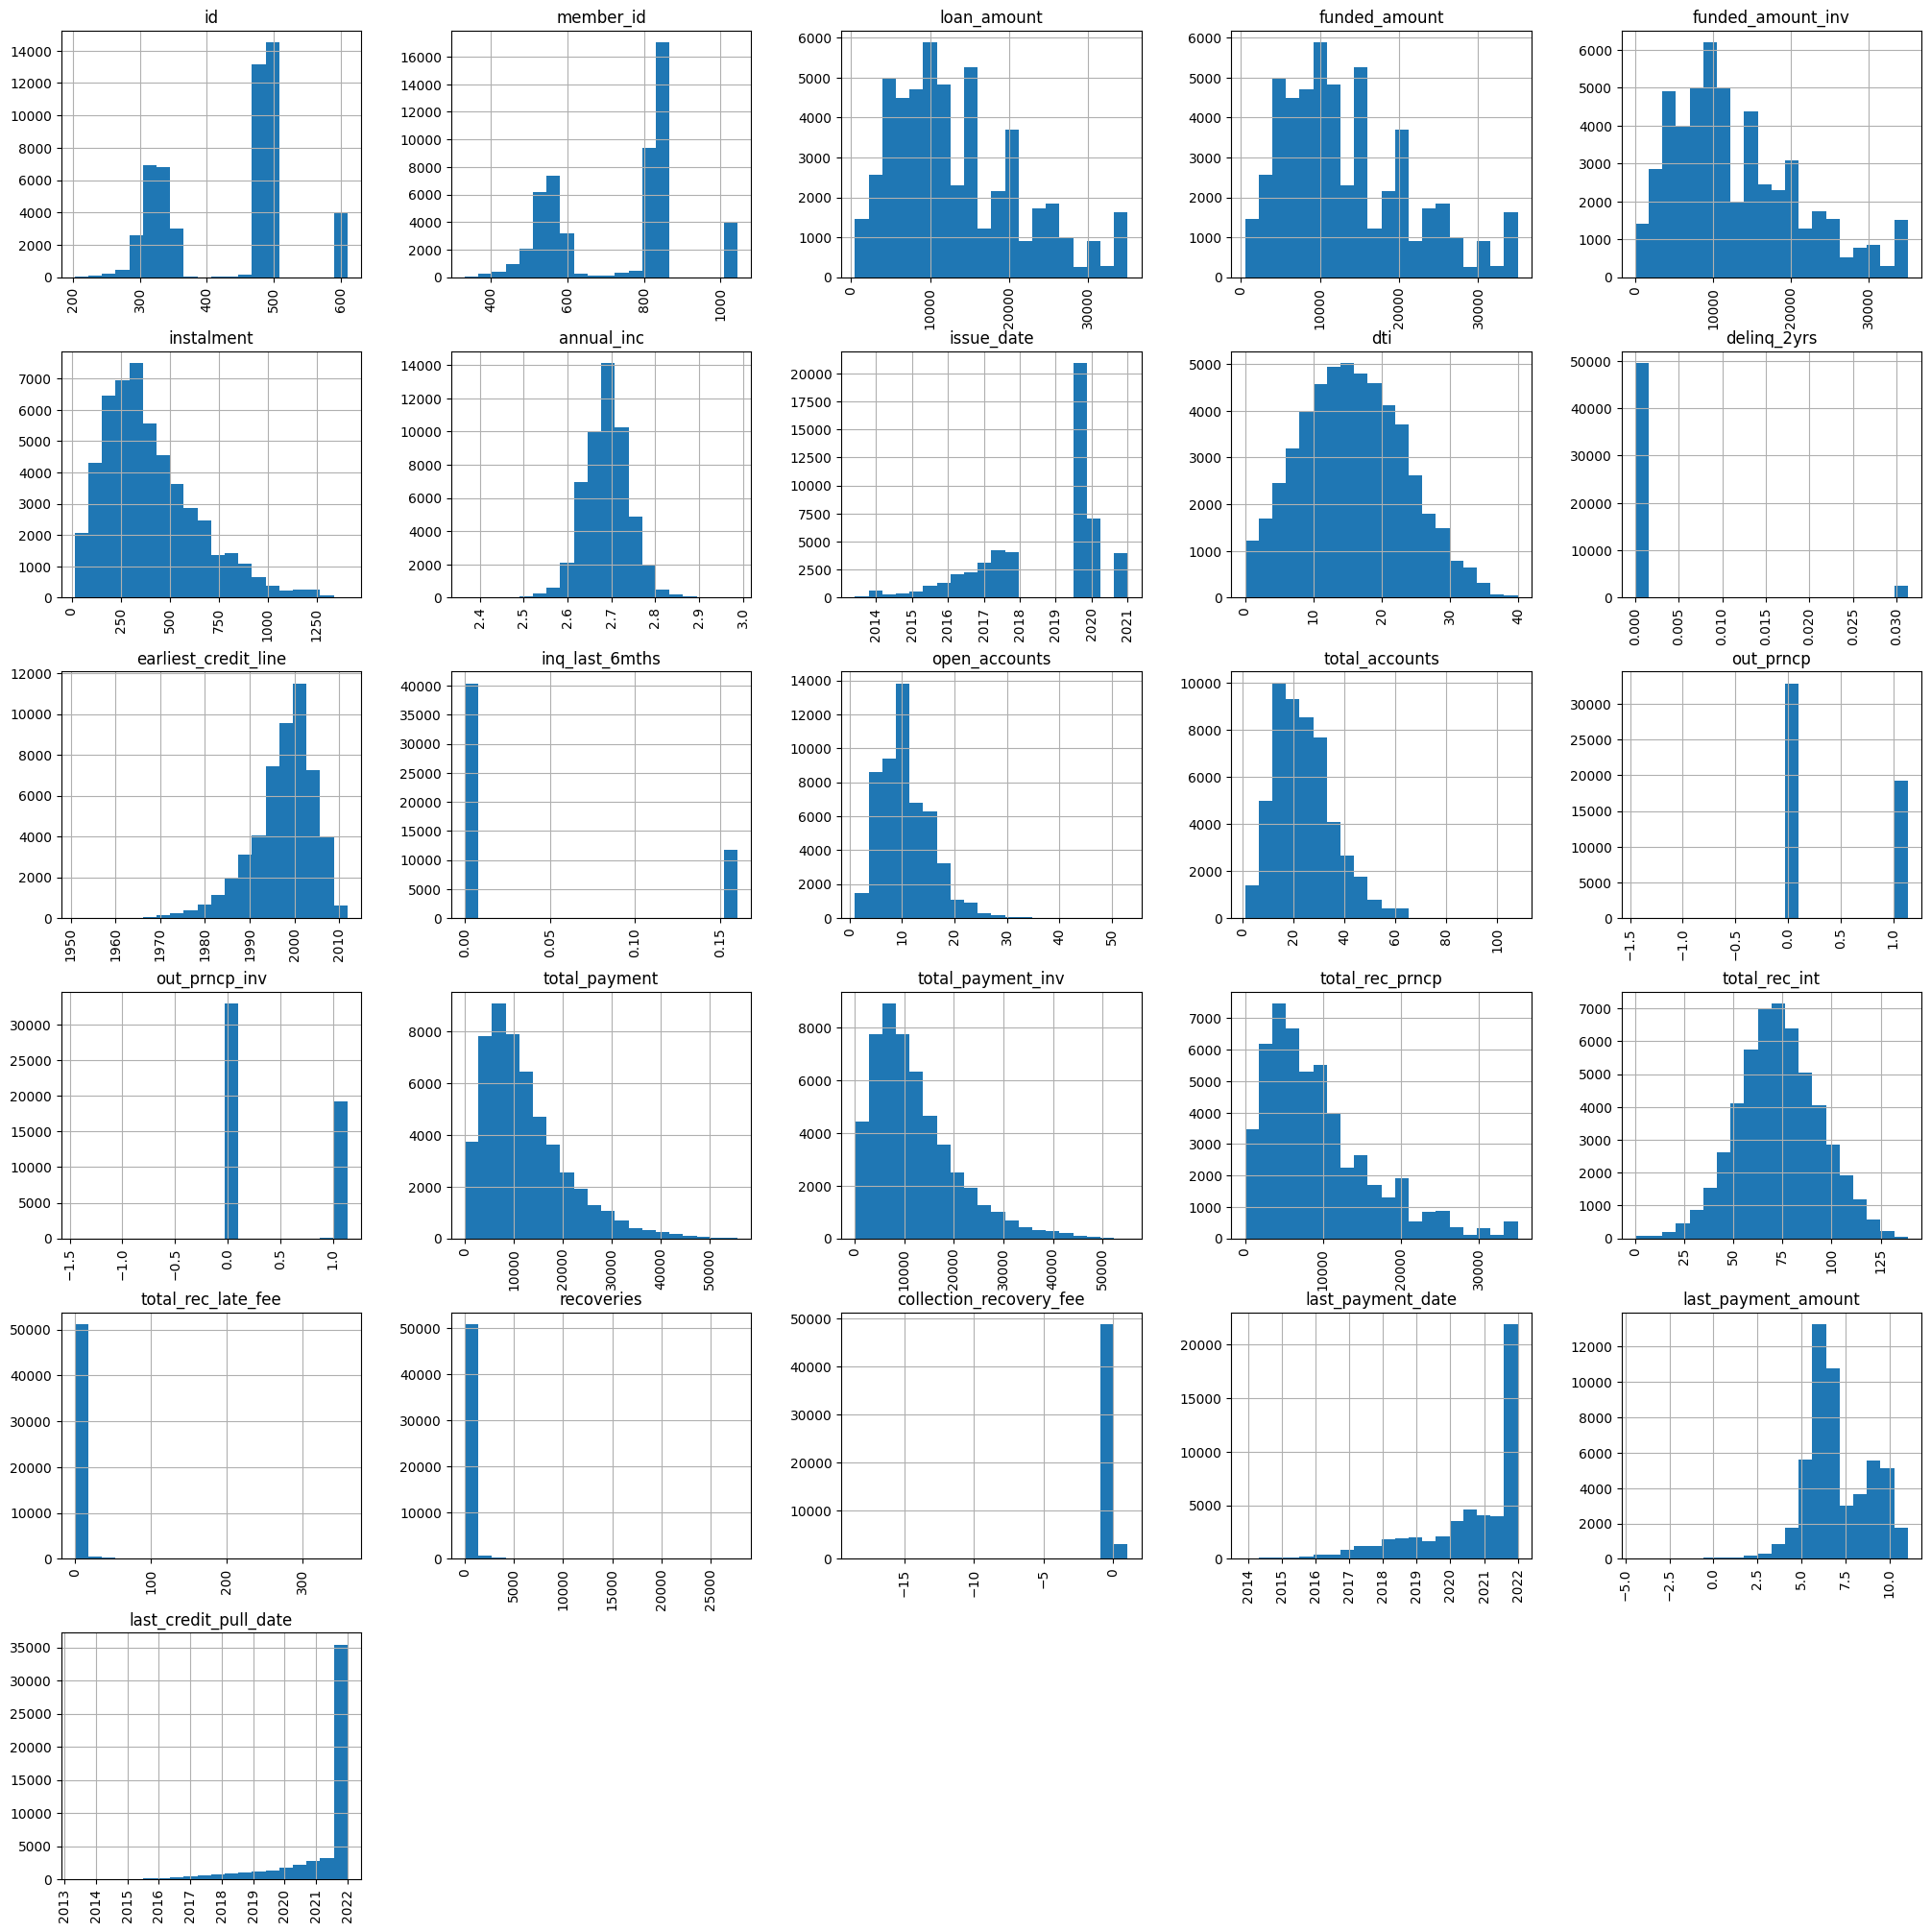

In [27]:
df_plot.plot_hist()

In [28]:

#   Removing extremely highly correlated columns in the dataframe

data_corr_matrix = new_database.corr(numeric_only = True).abs()
upper = data_corr_matrix.where(np.triu(np.ones(data_corr_matrix.shape), k=1).astype(bool))
to_drop = [database_col for database_col in upper.columns if any(upper[database_col] > 0.95)]
new_database.drop(to_drop, axis=1, inplace=True)

# Analysis and Visualisation

In [29]:
''' 
Finding the amount of loans recovered and visualising the results.
'''

recovered_payments = unrecovered_payments = 0

for element in new_database['out_prncp']:
    if element > 0:
        unrecovered_payments += 1
    else:
        recovered_payments += 1

### Plotting a pie chart of the amount of recovered and unrecovered loans

df_plot.plot_pie([unrecovered_payments, recovered_payments], ['Unrecovered payments', 'Recovered payments'], 'The amount of loans recovered against the investor funding and the total amount funded')

In [30]:
'''
Visualising and finding the percentage of the total amount that would be recovered up to 6 months' in the future.
'''

for position, member in new_database.iterrows():
    if member['loan_status'] in ['Current', 'In Grace Period']:
        outstanding_principle = member['out_prncp']
        instalment = member['instalment']

        recovered_6months = 6 * instalment

        if recovered_6months > outstanding_principle:
            unrecovered_payments -= 1
            recovered_payments += 1

### Plotting a pie chart to show how much of the payments would be recovered up to 6 months in the future

df_plot.plot_pie([unrecovered_payments, recovered_payments], ['Unrecovered payments up to 6 months in the future', 'Recovered payments up to 6 months in the future'], 'The amount of loans recovered against the investor funding and the total amount funded')

In [31]:
'''
Calculating the percentage of loans that have been a loss (i.e. charged off)
and the total amount that was paid towards these loans before being charged off.

Calculating the loss in revenue these loans would have generated for the company if they had finished 
their term and visualising the loss projected over the remaining term of these loans.
''' 

charged_off_loans = charged_off_total_paid = revenue_lost = 0
term_int_column = new_database['term'].astype('str').map(pd.Series({'36 months': 36, '60 months': 60}))
charged_off_members = []

projected_losses = {}

for index, row in new_database.iterrows(): 
    if 'Charged Off' in row['loan_status'] or row['loan_status'] == 'Default':
 
        charged_off_loans += 1
        charged_off_members.append(row)
        loan_term = term_int_column[index]
        loan_instalment = row['instalment']
        total_paid = row['total_payment']


        charged_off_total_paid += total_paid
        payment_left = (loan_term * loan_instalment) - total_paid
        instalments_left = round(payment_left/loan_instalment)
        revenue_lost += payment_left
        projected_losses[index] = [round(i*loan_instalment,2) for i in range(instalments_left)]

charged_off_percentage = (charged_off_loans/df_info.df_shape()[0]) * 100

print(f"Percentage of loans charged off: {round(charged_off_percentage, 2)}%")
print(f"Amount paid to the loand prior to being charged off: £{round(charged_off_total_paid, 2):,}")
print(f"Loss in revenue: £{round(revenue_lost, 2):,}")

Percentage of loans charged off: 10.95%
Amount paid to the loand prior to being charged off: £38,282,801.65
Loss in revenue: £65,506,567.19


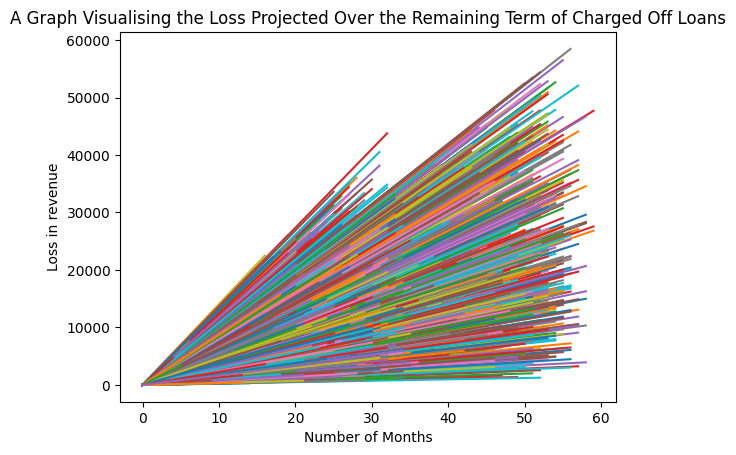

In [32]:
### Plotting a graph of the loss projected over the remaining term of loans if they had finished their term

projected_loss_df = pd.DataFrame.from_dict(dict([ (member,pd.Series(loss)) for member, loss in projected_losses.items() ]))
ax = projected_loss_df.plot(title = 'A Graph Visualising the Loss Projected Over the Remaining Term of Charged Off Loans', 
                            xlabel= 'Number of Months', ylabel = 'Loss in revenue')
ax.get_legend().remove()

In [33]:
'''
Finding the percentage of users who are currently behind with their loan payments and what they currently 
represent as a percentage of all loans. Calculating how much loss the company would incur if their status was 
changed to Charged Off. 

If customers late on payments converted to Charged Off, calculating the percentage of total expected revenue 
these customers and the customers who have already defaulted on their loan represent.
'''

late_members = []
late_payments = remaining_payments = total_payments = 0
late_payment_markers = ['Late (16-30 days)', 'In Grace Period', 'Late (31-120 days)']

for number, individual in new_database.iterrows():

    total_payments += individual['total_payment'] 

    if individual['loan_status'] in late_payment_markers:
        late_payments += 1
        late_members.append(individual)

        remaining_payments += individual['out_prncp'] 

total_loss = remaining_payments + revenue_lost
late_payment_percentage = (late_payments/df_info.df_shape()[0]) * 100
loss_percentage = (total_loss/total_payments) * 100

print(f"Number of late payments: {late_payments}")
print(f"Percentage of loan payments that are late: {round(late_payment_percentage, 2)}%")
print(f"Amount of loss if users with late loan payments were changed to Charged Off: £{round(remaining_payments,2)}")
print(f"Percentage of total expected revenue that late and charged off loans represent: {round(loss_percentage, 2)}%")

Number of late payments: 901
Percentage of loan payments that are late: 1.73%
Amount of loss if users with late loan payments were changed to Charged Off: £995.69
Percentage of total expected revenue that late and charged off loans represent: 10.31%


In [34]:
'''
Analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.
'''

charged_off_df = updated_charged_off_df = pd.DataFrame(charged_off_members).select_dtypes(exclude=['datetime64[ns]'])
late_df = updated_late_df = pd.DataFrame(late_members).select_dtypes(exclude=['datetime64[ns]'])

for col_title in categorical_data:
    for col_index in range(len(categorical_data)):
        crosstab = pd.crosstab([col_title], [categorical_data[col_index]])
        chi_val, p_val, degree, freqs = scipy.stats.chi2_contingency(crosstab)
        
        if p_val < 0.05:
            print(f"Colummns {col_title} and {categorical_data[col_index]} have a relationship.")

updated_charged_off_df = df2_transform.dummy_df(charged_off_df, updated_charged_off_df)
updated_late_df = df2_transform.dummy_df(late_df, updated_late_df)

charged_off_corr_matrix = df_info.check_correlation(updated_charged_off_df)
late_corr_matrix = df_info.check_correlation(updated_late_df)
np.seterr(divide='ignore', invalid='ignore')

charged_filter1 = charged_off_corr_matrix.abs() < 1
charged_filter2 = charged_off_corr_matrix.abs() > 0.6
late_filter1 = late_corr_matrix.abs() < 1
late_filter2 = late_corr_matrix.abs() > 0.6

charged_off_correlations = charged_off_corr_matrix.where(charged_filter1 & charged_filter2 & np.triu(np.ones((508,508)), k=1)).stack().sort_values()
late_correlations = late_corr_matrix.where(late_filter1 & late_filter2 & np.triu(np.ones((223,223)), k=1)).stack().sort_values()

unpaid_common_variables, late_variables, charged_off_variables = ([] for list_number in range(3))

for late_term, late_correlation in late_correlations.items():
    late_variables.append(late_term)
    for charged_term, charged_correlation in charged_off_correlations.items():
        charged_off_variables.append(charged_term)
        if set(late_term) == set(charged_term):
            unpaid_common_variables.append(late_term)

late_variables = list(set(late_variables))
charged_off_variables = list(set(charged_off_variables))

print('The following variables have a strong correlation for all unpaid loans:')
for unpaid_var in unpaid_common_variables:
    print(f"{unpaid_var[0]} and {unpaid_var[1]}")

print('\n\nThe following variables have a strong correlation for charged off loans:')
for charged_var in charged_off_variables:
    print(f"{charged_var[0]} and {charged_var[1]}") 

print('\n\nThe following variables have a strong correlation for late loans:')
for late_var in late_variables:
    print(f"{late_var[0]} and {late_var[1]}")

ValueError: Unable to coerce to DataFrame, shape must be (510, 510): given (508, 508)